In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_fontja

In [63]:
### Excelデータを見てパラメータを設定
data_path = '../data/private/sample_data.xlsx'
sheet_name = 'N数'
col_start = 1
col_end = 102
row_start = 17
row_end = 118
drop_col_list = [2]
drop_row_list = [18]
drop_all_zero_col = False
drop_all_zero_rost = False

### Read data
df_full = pd.read_excel(data_path, sheet_name=sheet_name, header=row_start-1, index_col=col_start-1)

### Select a subset of the DataFrame
df_subset = df_full.iloc[:row_end-row_start, :col_end-col_start]

### Drop specified columns
df_subset.drop(columns=df_subset.columns[np.array(drop_col_list)-col_start-1], inplace=True)

### Drop specified rows
df_subset.drop(index=df_subset.index[np.array(drop_row_list)-row_start-1], inplace=True)

### Drop columns with all zero values
if drop_all_zero_col:
    df_subset = df_subset.loc[:, (df_subset != 0).any(axis=0)]

### Drop rows with all zero values
if drop_all_zero_rost:
    df_subset = df_subset.loc[(df_subset != 0).any(axis=1), :]

df_subset.head()

,model001,model002,model003,model004,model005,model006,model007,model008,model009,model010,...,model091,model092,model093,model094,model095,model096,model097,model098,model099,model100
model001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
model002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
model003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
model004,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
model005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,modelA,modelB,modelC,modelABC
model046,1,0,4,5
model097,0,1,2,3
model068,1,1,0,2
model070,1,1,0,2
model076,0,1,1,2
model090,0,1,0,1
model087,0,0,1,1
model086,0,1,0,1
model083,0,0,1,1
model074,0,1,0,1


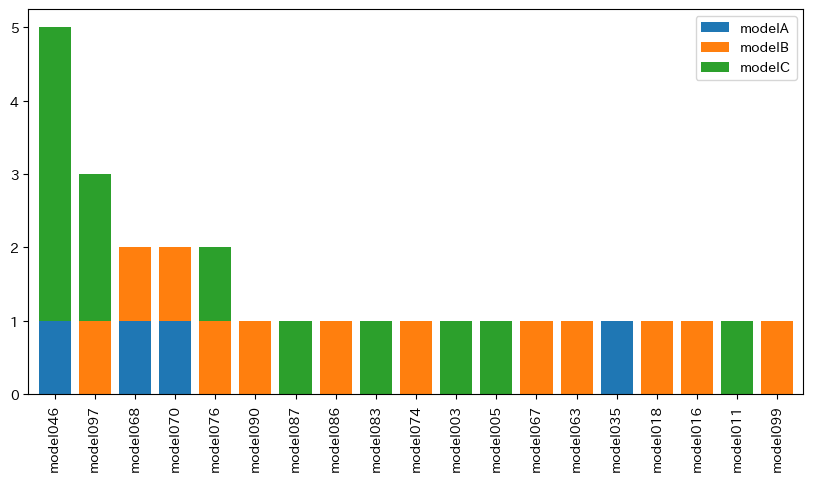

In [94]:
### Analysis 1
target_list = ['model062', 'model063', 'model064', 'model065', 'model066']
totalling_param_list = [
    {'totalled_value_name': 'modelA',
     'totalling_values': ['model062']},
    {'totalled_value_name': 'modelB',
     'totalling_values': ['model063', 'model064']},
    {'totalled_value_name': 'modelC',
     'totalling_values': ['model065', 'model066']},
    {'totalled_value_name': 'modelABC',
     'totalling_values': ['modelA', 'modelB', 'modelC']},
]
sorted_target = 'modelABC'

### Select a subset of the DataFrame for analysis 1
df_analysis1 = df_subset[target_list]

### Totalling columns
df_analysis1_total = df_analysis1.copy()
for param in totalling_param_list:
    df_analysis1_total[param['totalled_value_name']] = df_analysis1_total[param['totalling_values']].sum(axis=1)
df_analysis1_total = df_analysis1_total[[param['totalled_value_name'] for param in totalling_param_list]]

### Drop rows with all zero values
df_analysis1_total = df_analysis1_total.loc[(df_analysis1_total != 0).any(axis=1), :]

### Sort the DataFrame by the specified column
df_analysis1_total.sort_values(by=sorted_target, ascending=False, inplace=True)

### Display the analysis result
display(df_analysis1_total)

### Figure
fig, ax = plt.subplots(figsize=(10, 5))
df_analysis1_total[['modelA', 'modelB', 'modelC']].plot(
    kind='bar', 
    stacked=True, 
    ax=ax, 
    width=0.8,
    legend=True
)
ax.set_xticklabels(df_analysis1_total.index)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('')
plt.legend()
plt.show()

,modelA,modelB,modelC,modelABC
model043,0,3,0,3
model089,0,2,0,2
model005,0,1,0,1
model054,0,0,1,1
model096,1,0,0,1
model093,1,0,0,1
model088,0,1,0,1
model063,0,1,0,1
model061,0,0,1,1
model058,0,0,1,1


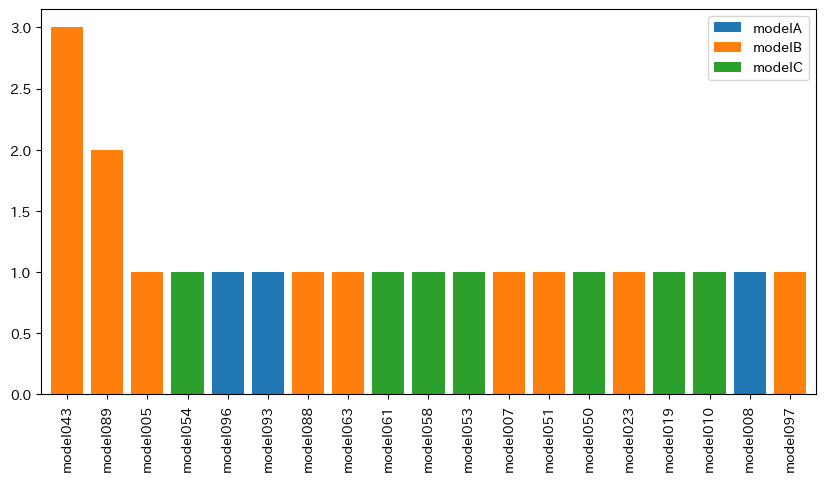

In [96]:
### Analysis 2
target_list = ['model062', 'model063', 'model064', 'model065', 'model066']
totalling_param_list = [
    {'totalled_value_name': 'modelA',
     'totalling_values': ['model062']},
    {'totalled_value_name': 'modelB',
     'totalling_values': ['model063', 'model064']},
    {'totalled_value_name': 'modelC',
     'totalling_values': ['model065', 'model066']},
    {'totalled_value_name': 'modelABC',
     'totalling_values': ['modelA', 'modelB', 'modelC']},
]
sorted_target = 'modelABC'

### Select a subset of the DataFrame for analysis 2
df_analysis2 = df_subset.T[target_list]

### Totalling columns
df_analysis2_total = df_analysis2.copy()
for param in totalling_param_list:
    df_analysis2_total[param['totalled_value_name']] = df_analysis2_total[param['totalling_values']].sum(axis=1)
df_analysis2_total = df_analysis2_total[[param['totalled_value_name'] for param in totalling_param_list]]

### Drop rows with all zero values
df_analysis2_total = df_analysis2_total.loc[(df_analysis2_total != 0).any(axis=1), :]

### Sort the DataFrame by the specified column
df_analysis2_total.sort_values(by=sorted_target, ascending=False, inplace=True)

### Display the analysis result
display(df_analysis2_total)

### Figure
fig, ax = plt.subplots(figsize=(10, 5))
df_analysis2_total[['modelA', 'modelB', 'modelC']].plot(
    kind='bar', 
    stacked=True, 
    ax=ax, 
    width=0.8,
    legend=True
)
ax.set_xticklabels(df_analysis2_total.index)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('')
plt.legend()
plt.show()

In [97]:
### Analysis 3
target_list = df_analysis2_total.index.tolist()

### Select a subset of the DataFrame for analysis 1
df_analysis3 = df_subset[target_list]

### Drop rows with all zero values
df_analysis3 = df_analysis3.loc[(df_analysis3 != 0).any(axis=1), :]

df_analysis3_total = pd.DataFrame(df_analysis3.sum(axis=1), columns=['sum'])

display(df_analysis3_total)

,sum
model004,1
model005,2
model006,4
model008,1
model009,6
...,...
model093,1
model094,1
model096,1
model097,3


,Analysis1,Analysis2,Analysis3,Total
model064,0,0,7,7
model086,1,0,6,7
model063,1,1,5,7
model097,3,1,3,7
model046,5,0,1,6
...,...,...,...,...
model003,1,0,0,1
model055,0,0,1,1
model022,0,0,1,1
model059,0,0,1,1


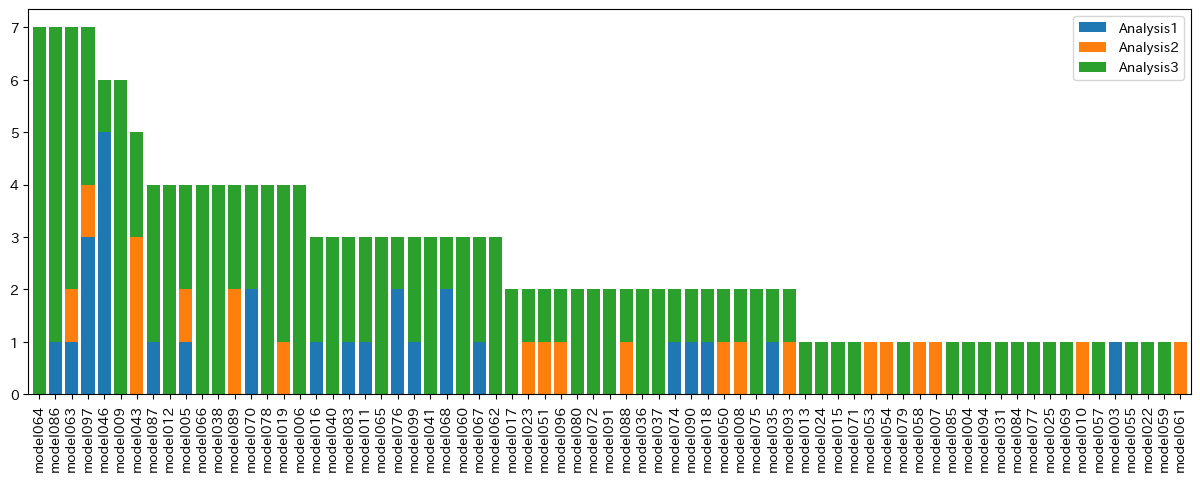

In [109]:
### Result
result_analysis1 = df_analysis1_total.index.tolist()
result_analysis2 = df_analysis2_total.index.tolist()
result_analysis3 = df_analysis3_total.index.tolist()
merged_list = list(set(result_analysis1 + result_analysis2 + result_analysis3))

result = pd.DataFrame(
    {
        'Analysis1': [df_analysis1_total.loc[idx, 'modelABC'] if idx in df_analysis1_total.index else 0 for idx in merged_list],
        'Analysis2': [df_analysis2_total.loc[idx, 'modelABC'] if idx in df_analysis2_total.index else 0 for idx in merged_list],
        'Analysis3': [df_analysis3_total.loc[idx, 'sum'] if idx in df_analysis3_total.index else 0 for idx in merged_list],
    },
    index=merged_list
)

result['Total'] = result.sum(axis=1)
result.sort_values(by='Total', ascending=False, inplace=True)

display(result)
### Figure
fig, ax = plt.subplots(figsize=(15, 5))
result[['Analysis1', 'Analysis2', 'Analysis3']].plot(
    kind='bar', 
    stacked=True, 
    ax=ax, 
    width=0.8,
    legend=True
)
ax.set_xticklabels(result.index)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('')
plt.legend()
plt.show()